In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.patches as mpatches

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
print (engine.table_names())
first_row = session.query(Measurement).first()
first_row.__dict__

['measurement', 'station']


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x115264630>,
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397'}

In [12]:
engine.execute('select * from measurement ').fetchall()



[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [13]:
inspector = inspect(engine)
columns = inspector.get_columns('meaMsurement')
for c in columns:
    print(c['name'], c["type"])

# Exploratory Climate Analysis

In [14]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [15]:
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

2016-08-23


In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
    
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

results=session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df_prcp=pd.DataFrame(results)
# Sort the dataframe by date
df_prcp_sort=df_prcp.sort_values(by='date', ascending=True)
# Use Pandas Plotting with Matplotlib to plot the data
df_rename=df_prcp_sort.rename(columns={"prcp":"precipitation"})
df_rename.set_index('date',inplace=True)
df_rename.head()


,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


Text(0.5, 0, 'Date')

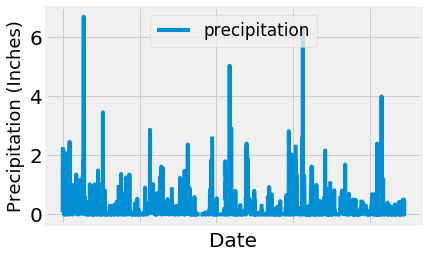

In [17]:

df_rename.plot()
plt.style.use('fivethirtyeight')
#plt.title("precipitation data")
plt.yticks(size=20)
plt.ylabel("Precipitation (Inches)", size=18)
plt.legend(loc="upper center",fontsize="large")
plt.xlabel("Date", size=20)


In [18]:
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

![precipitation](Images/precipitation.png)

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_rename.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [20]:
# Design a query to show how many stations are available in this dataset?
count=session.query((Measurement.station)).count()
count

19550

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Active_station=session.query(Measurement.station,func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by((func.count(Measurement.station).desc())).all()
for station, count in Active_station:
    print("Station",station,"had",count, "weather observations.")

most_active_station=Active_station[0][0]
print("\n The most active station is ", most_active_station)

Station USC00519281 had 2772 weather observations.
Station USC00519397 had 2724 weather observations.
Station USC00513117 had 2709 weather observations.
Station USC00519523 had 2669 weather observations.
Station USC00516128 had 2612 weather observations.
Station USC00514830 had 2202 weather observations.
Station USC00511918 had 1979 weather observations.
Station USC00517948 had 1372 weather observations.
Station USC00518838 had 511 weather observations.

 The most active station is  USC00519281


In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
low_high=session.query(Measurement.station,func.max(Measurement.tobs),func.min(Measurement.tobs)).\
            group_by(Measurement.station).\
            order_by(func.max(Measurement.tobs).desc()).all()

for station, max,min in low_high:
    print(station,max,min)

Avg_temp=session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station ).\
            group_by(Measurement.station).all()
print("Average temperatire of",most_active_station,"is" ,Avg_temp)

USC00511918 87.0 53.0
USC00517948 87.0 58.0
USC00519397 87.0 56.0
USC00513117 85.0 59.0
USC00514830 85.0 58.0
USC00519281 85.0 54.0
USC00519523 85.0 56.0
USC00516128 84.0 58.0
USC00518838 83.0 58.0
Average temperatire of USC00519281 is [(71.66378066378067,)]


In [23]:
# Choose the station with the highest number of temperature observations.
session.query(Measurement.station,func.count(Measurement.tobs)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.tobs).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_df=session.query(Measurement.station,Measurement.date,Measurement.tobs).\
filter(Measurement.station == most_active_station).\
filter(Measurement.date >= last_year).\
    order_by((Measurement.date)).all()


station_df=pd.DataFrame(station_df)
station_df.head()


,station,date,tobs
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0
3,USC00519281,2016-08-26,80.0
4,USC00519281,2016-08-27,75.0


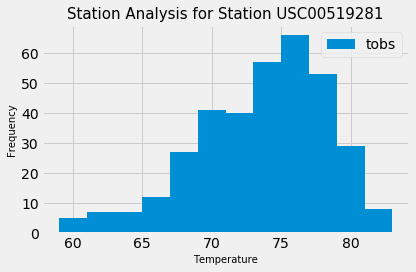

In [25]:
plt.hist(station_df['tobs'],12)
plt.xlabel("Temperature",size=10)
plt.ylabel("Frequency",size=10)
plt.title("Station Analysis for Station " + most_active_station,size=15)
plt.legend(["tobs"])
plt.tight_layout()
plt.show()


![precipitation](Images/station-histogram.png)

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_query=calc_temps('2017-04-21', '2017-04-27')
print(trip_query)

[(68.0, 74.86046511627907, 81.0)]


In [28]:
df_trip=pd.DataFrame(trip_query,columns=['tmin', 'tavg', 'tmax'])
df_trip

,tmin,tavg,tmax
0,68.0,74.860465,81.0


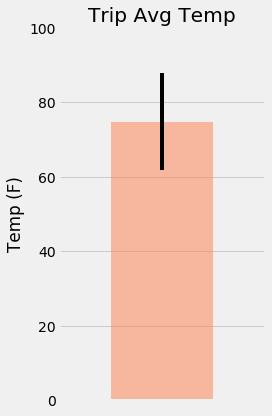

In [29]:
# Plot the results from your previous query as a bar chart. 

# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
df_trip.plot.bar(y='tavg', yerr=(df_trip['tmax'] - df_trip['tmin']), 
                 title='Trip Avg Temp', color='coral', alpha=0.5, figsize=(4,6))
plt.ylim(0,100)
plt.title("Trip Avg Temp")
plt.xticks(np.arange(1, 1.0))
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.gca().legend_.remove()
plt.show()


In [30]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

start_date='2017-04-21'
end_date='2017-04-27'
sel = [Measurement.station, 
           Station.name, 
           Station.latitude, 
           Station.longitude, 
           Station.elevation, 
           Measurement.prcp]
session.query(*sel).\
            filter(Measurement.station == Station.station).\
filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.station).\
order_by(Measurement.prcp.desc()).all()


[('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  2.36),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  1.84),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  1.74),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.16),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  1.05),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.23),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]

## Optional Challenge Assignment

In [31]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [37]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
start_date='2017-04-21'
end_date='2017-04-27'

# Set the start and end date of the trip

# Use the start and end date to create a range of dates
dates = session.query(Measurement.date).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.date).all()
trip_dates=[]
stripped_dates=[]
# List comprehension to get the elements in the tuple from the dates query 
for date in dates:
        
        trip_dates.append(date[0])

# Stip off the year and save a list of %m-%d strings with another list comprehension 
for date in trip_dates:
        stripped_dates.append(date[5:])
#print(stripped_dates)
# Find the start month/day and the end month/day 
start_month_day = stripped_dates[0]
end_month_day = stripped_dates[-1]
#start_month_day
#end_month_day


# Loop through the list of %m-%d strings and calculate the normals for each date
daily_normals = [session.query(func.min(Measurement.tobs),
                       func.avg(Measurement.tobs),
                       func.max(Measurement.tobs)).filter(func.strftime("%m-%d", Measurement.date) >= start_month_day).\
                 filter(func.strftime("%m-%d", Measurement.date) <= end_month_day).\
                 group_by(func.strftime("%m-%d", Measurement.date)).all()]

daily_normals = daily_normals[0]
print("Daily Normals for 04-21 to 04-27")
daily_normals



Daily Normals for 04-21 to 04-27


[(66.0, 72.32142857142857, 78.0),
 (65.0, 72.92727272727272, 84.0),
 (65.0, 73.01818181818182, 79.0),
 (67.0, 73.3103448275862, 80.0),
 (66.0, 73.96551724137932, 83.0),
 (66.0, 74.01724137931035, 81.0),
 (65.0, 72.87272727272727, 81.0)]

In [38]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
daily_normals_df= pd.DataFrame(daily_normals,columns=['tmin', 'tavg', 'tmax'])
daily_normals_df['date']= trip_dates
daily_normals_df['date'] = pd.to_datetime(daily_normals_df['date'], format='%Y-%m-%d')

# Set index to date
daily_normals_df.set_index('date',inplace=True)

daily_normals_df

,tmin,tavg,tmax
date,,,
2017-04-21,66.0,72.321429,78.0
2017-04-22,65.0,72.927273,84.0
2017-04-23,65.0,73.018182,79.0
2017-04-24,67.0,73.310345,80.0
2017-04-25,66.0,73.965517,83.0
2017-04-26,66.0,74.017241,81.0
2017-04-27,65.0,72.872727,81.0


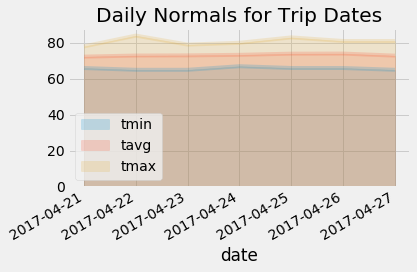

In [39]:
# Plot the daily normals as an area plot with `stacked=False`
daily_normals_df.plot(kind='area', alpha=.2, stacked=False, x_compat=True, title="Daily Normals for Trip Dates")
plt.tight_layout()
plt.show()
